In [1]:
import os

import polars as pl
import seaborn as sns

In [2]:
sns.set_theme(style="darkgrid")

In [3]:
path_acc = os.path.join(
    "run-2024-08-13_19-06-44-n500_contamination",
    "accuracies",
    "m100",
    "n500",
    "mistral-qlora-zero-shot-packing",
    "ag_news",
    "accuracies.csv",
)

df = pl.read_csv(path_acc)
num_subsamples = len(df)

# There was a training run that super underperformed. Excluding it causes:
# mean_eval_bias=0.0032, p_value=0.4057

acc_thresh = 0.43
mask = (pl.col("extra") > acc_thresh).and_((pl.col("test") > acc_thresh))
df = df.filter(mask)
assert len(df) == num_subsamples - 1

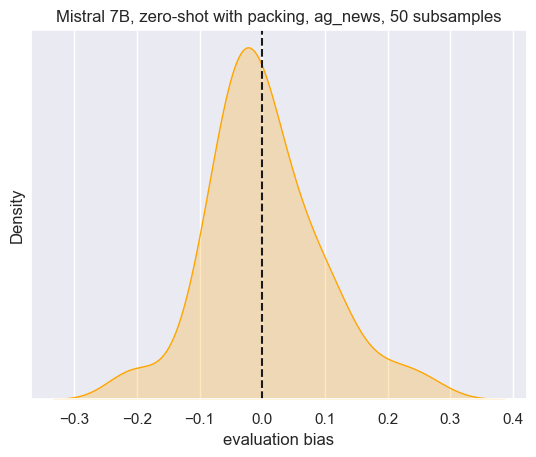

In [4]:
ax = sns.kdeplot(df["test"] - df["extra"], color="orange", fill=True)
ax.set_yticks([])
ax.set_xlabel("evaluation bias")
ax.set_title("Mistral 7B, zero-shot with packing, ag_news, 50 subsamples")
ax.axvline(0, linestyle="dashed", color="k");